## Data Exploration and Preprocessing

In [81]:
# Upgrade scikit-learn version.
pip install --upgrade scikit-learn --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset.
dataset = pd.read_csv(r"C:\Users\20106\Downloads\Machine Learning\Strokesdataset.csv")
print (dataset.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
# Gather info such as number of null values and data types for each column in the dataset.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
# Print the shape of the dataset.
dataset.shape

(43400, 12)

In [5]:
# Look for null values.
dataset.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [6]:
# Drop missing values from the dataset.
dataset.dropna(inplace=True)
print('Missing values: ',sum(dataset.isnull().sum()))

Missing values:  0


In [7]:
# Print the shape of the dataset.
dataset.shape

(29072, 12)

In [8]:
# Look for duplicate values using the column "id".
# There are no dupicates in the daatset.
duplicates = dataset["id"].duplicated().any()
print (duplicates)

False


In [9]:
# We can now drop the column "id" since it is no longer neccessary.
dataset_new = dataset.drop(["id"], axis = 1)
print (dataset_new.head)

<bound method NDFrame.head of        gender   age  hypertension  heart_disease ever_married      work_type  \
1        Male  58.0             1              0          Yes        Private   
3      Female  70.0             0              0          Yes        Private   
6      Female  52.0             0              0          Yes        Private   
7      Female  75.0             0              1          Yes  Self-employed   
8      Female  32.0             0              0          Yes        Private   
...       ...   ...           ...            ...          ...            ...   
43395  Female  10.0             0              0           No       children   
43396  Female  56.0             0              0          Yes       Govt_job   
43397  Female  82.0             1              0          Yes        Private   
43398    Male  40.0             0              0          Yes        Private   
43399  Female  82.0             0              0          Yes        Private   

      Res

In [10]:
# Print the shape of the dataset.
dataset_new.shape

(29072, 11)

In [11]:
# Explore the dataset characteristics such as mean, median and standard deviation (EDA).
print(dataset_new.describe(include="all"))

        gender           age  hypertension  heart_disease ever_married  \
count    29072  29072.000000  29072.000000   29072.000000        29072   
unique       3           NaN           NaN            NaN            2   
top     Female           NaN           NaN            NaN          Yes   
freq     17852           NaN           NaN            NaN        21690   
mean       NaN     47.671746      0.111482       0.052146          NaN   
std        NaN     18.734490      0.314733       0.222326          NaN   
min        NaN     10.000000      0.000000       0.000000          NaN   
25%        NaN     32.000000      0.000000       0.000000          NaN   
50%        NaN     48.000000      0.000000       0.000000          NaN   
75%        NaN     62.000000      0.000000       0.000000          NaN   
max        NaN     82.000000      1.000000       1.000000          NaN   

       work_type Residence_type  avg_glucose_level           bmi  \
count      29072          29072       29072

### Data Visualization (EDA)

stroke:  548
no_stroke:  28524


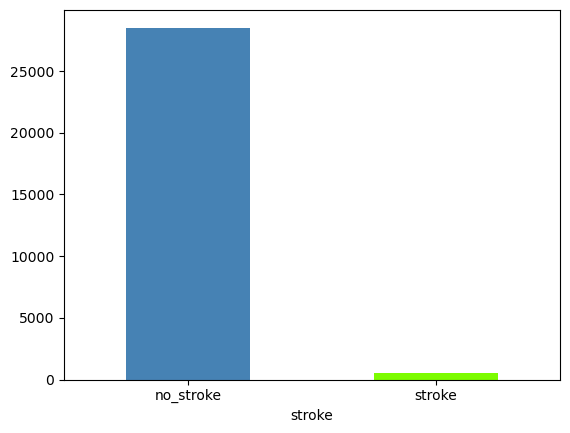

In [12]:
# Count plot for the number of each case (stroke, no stroke).
# The plot shows that the data is extremely imbalanced.
st_plot = dataset_new["stroke"].value_counts().plot(kind = "bar", color = ["steelblue","lawngreen"], rot = 0)
plt.xticks(ticks = [1,0], labels = ["stroke", "no_stroke"]);
print('stroke: ', sum(dataset_new['stroke'] == 1))
print('no_stroke: ', sum(dataset_new['stroke'] == 0))

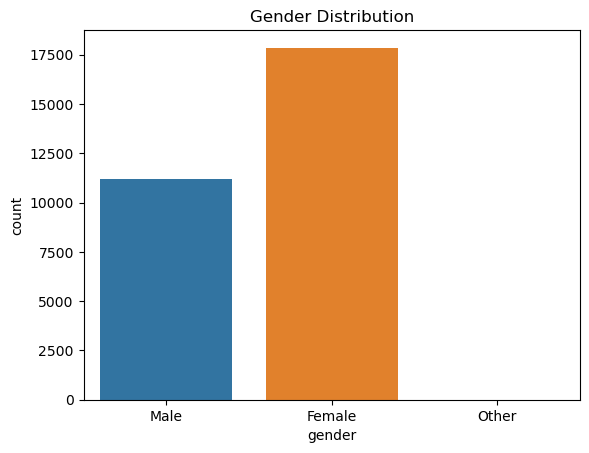

In [13]:
# Gender distribution plot.
plt.title('Gender Distribution')
sns.countplot(x = dataset_new['gender']);

In [14]:
# Number of people with unidentified genders "other".
(dataset_new['gender'] == 'Other').sum()

7

In [15]:
# Drop unidentified genders.
dataset_new.drop(dataset_new[dataset_new['gender'] == 'Other'].index, axis = 0, inplace = True)

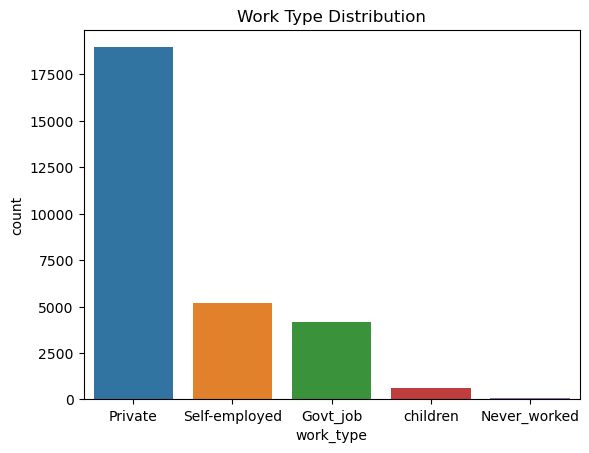

In [16]:
# Work type distribution plot.
plt.title('Work Type Distribution')
sns.countplot(x = dataset_new['work_type']);

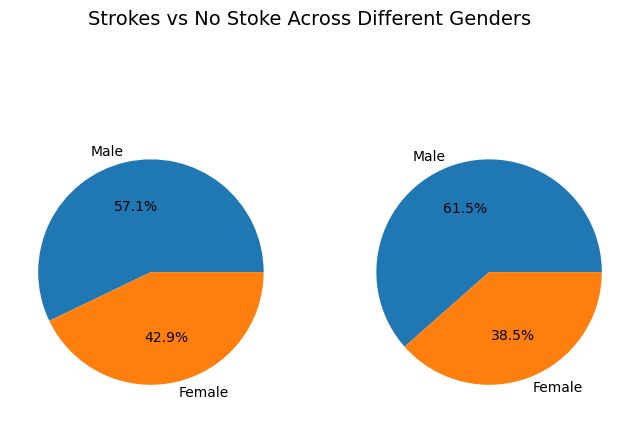

In [17]:
# Plot a pie chart for the number of stroke and no stroke cases across different genders.
fig, (pt1, pt2) = plt.subplots(1, 2, figsize=(8, 5))

pt1.pie(dataset_new[dataset_new['stroke'] == 1]['gender'].value_counts(), 
        labels=dataset_new[dataset_new['stroke'] == 1]['gender'].unique(), 
        autopct="%1.1f%%")
plt.suptitle('Strokes vs No Stoke Across Different Genders', fontsize=14, y=1.02)

pt2.pie(dataset_new[dataset_new['stroke'] == 0]['gender'].value_counts(), 
        labels=dataset_new[dataset_new['stroke'] == 0]['gender'].unique(), 
        autopct="%1.1f%%")  

plt.show()

Heart Disease:  1516
No Heart Disease:  27549


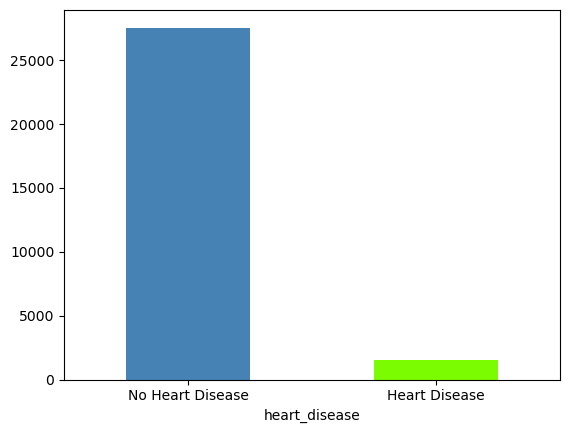

In [18]:
# Count plot for the number of heart disease cases.
st_plot = dataset_new["heart_disease"].value_counts().plot(kind = "bar", color = ["steelblue","lawngreen"], rot = 0)
plt.xticks(ticks = [1,0], labels = ["Heart Disease", "No Heart Disease"]);
print('Heart Disease: ', sum(dataset_new['heart_disease'] == 1))
print('No Heart Disease: ', sum(dataset_new['heart_disease'] == 0))

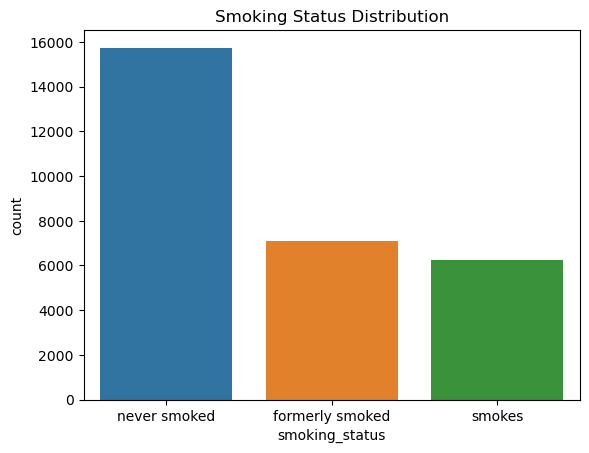

In [19]:
# Count plot for the smoking status
plt.title('Smoking Status Distribution')
sns.countplot(x = dataset_new['smoking_status']);

## Feature Engineering

In [20]:
# Encode categorical values using label encoding. 

le = LabelEncoder()
dataset_new['gender'] = le.fit_transform(dataset_new['gender'])
dataset_new['ever_married'] = le.fit_transform(dataset_new['ever_married'])
dataset_new['work_type'] = le.fit_transform(dataset_new['work_type'])
dataset_new['Residence_type']= le.fit_transform(dataset_new['Residence_type'])
dataset_new['smoking_status'] = le.fit_transform(dataset_new['smoking_status'])

In [22]:
print(dataset_new.describe(include="all"))

            gender           age  hypertension  heart_disease  ever_married  \
count  29065.00000  29065.000000  29065.000000   29065.000000  29065.000000   
mean       0.38579     47.676174      0.111509       0.052159      0.746155   
std        0.48679     18.732941      0.314766       0.222351      0.435217   
min        0.00000     10.000000      0.000000       0.000000      0.000000   
25%        0.00000     32.000000      0.000000       0.000000      0.000000   
50%        0.00000     48.000000      0.000000       0.000000      1.000000   
75%        1.00000     62.000000      0.000000       0.000000      1.000000   
max        1.00000     82.000000      1.000000       1.000000      1.000000   

          work_type  Residence_type  avg_glucose_level           bmi  \
count  29065.000000    29065.000000       29065.000000  29065.000000   
mean       1.929228        0.502047         106.405639     30.054684   
std        0.916246        0.500004          45.272453      7.193951   


In [23]:
# Scaling the now numrical columns except the "stroke" one.
scaler = StandardScaler()
columns_to_scale = dataset_new.columns[dataset_new.columns != "stroke"]
dataset_new[columns_to_scale] = scaler.fit_transform(dataset_new[columns_to_scale])

In [24]:
dataset_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,1.261777,0.551115,2.822749,-0.234583,0.583270,0.077243,0.995914,-0.407443,1.271273,0.044108,0
3,-0.792533,1.191709,-0.354265,-0.234583,0.583270,0.077243,-1.004103,-0.825365,0.812546,-1.434562,0
6,-0.792533,0.230818,-0.354265,-0.234583,0.583270,0.077243,0.995914,-0.636505,-1.717401,-1.434562,0
7,-0.792533,1.458623,-0.354265,4.262882,0.583270,1.168672,-1.004103,3.028922,-0.424626,0.044108,0
8,-0.792533,-0.836838,-0.354265,-0.234583,0.583270,0.077243,-1.004103,-0.634738,0.312117,1.522779,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,-0.792533,-2.011260,-0.354265,-0.234583,-1.714472,2.260101,0.995914,-1.055089,-1.342079,0.044108,0
43396,-0.792533,0.444349,-0.354265,-0.234583,0.583270,-2.105615,0.995914,2.368023,3.523203,-1.434562,0
43397,-0.792533,1.832303,2.822749,-0.234583,0.583270,0.077243,0.995914,-0.319530,-0.160510,-1.434562,0
43398,1.261777,-0.409776,-0.354265,-0.234583,0.583270,0.077243,0.995914,-0.160048,0.437224,0.044108,0


### Outliers Detection

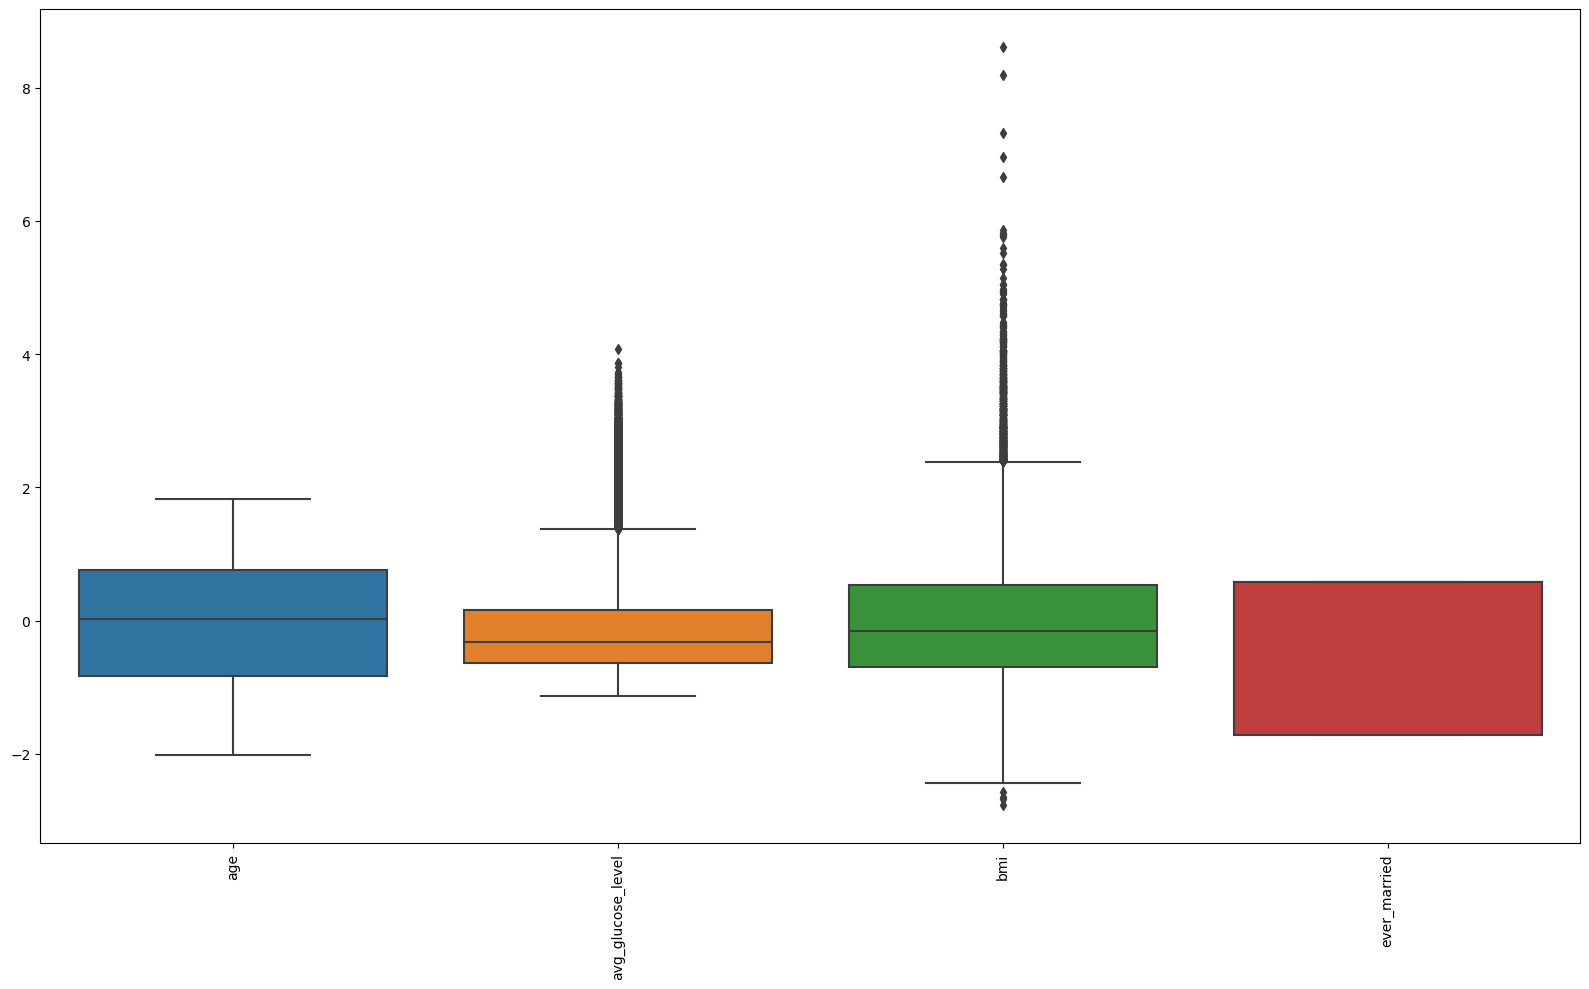

In [25]:
# Check for outliers in the dataset using box plot.
# We can tell from the box plot that the dataset is full of outliers that we need to take care of.
columns_to_plot = ["age", "avg_glucose_level", "bmi", "ever_married"]

plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset_new[columns_to_plot])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
# Handling outliers for all columns except "stroke"
import numpy as np

# Exclude the "stroke" column.
exclude_column = 'stroke'

# Select numerical columns except the one to exclude
numerical_columns = dataset_new.select_dtypes(include=["float64", "int64"]).columns
columns_to_transform = [col for col in numerical_columns if col != exclude_column]


def handle_outliers(col):
    # Compute the IQR for the column
    Q1 = dataset_new[col].quantile(0.25)
    Q3 = dataset_new[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Handle outliers by capping them at the bounds
    dataset_new[col] = np.where(dataset_new[col] < lower_bound, lower_bound, dataset_new[col])
    dataset_new[col] = np.where(dataset_new[col] > upper_bound, upper_bound, dataset_new[col])

# Apply the function to each column in the list
for col in columns_to_transform:
    handle_outliers(col)


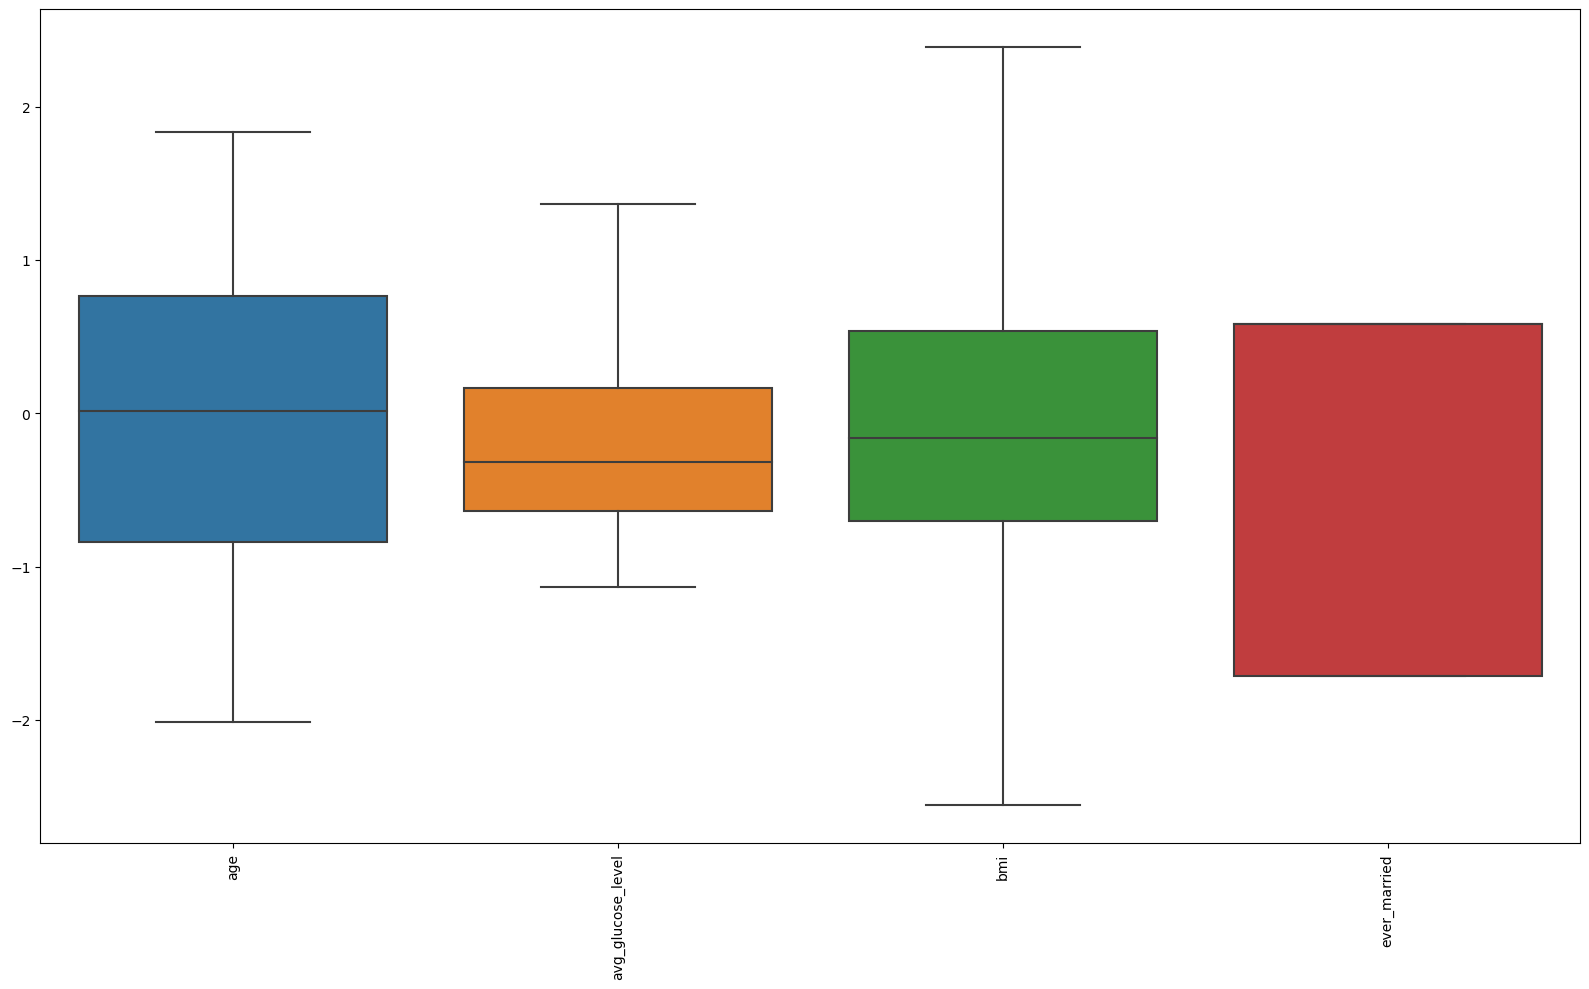

In [27]:
# Check for outliers in the dataset using box plot.
# We can now see that the outliers have been dropped.
columns_to_plot = ["age", "avg_glucose_level", "bmi", "ever_married"]

plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset_new[columns_to_plot])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Model Development and Evaluation

In [28]:
# Select features and target variables.
x = dataset_new.drop(["stroke"],axis=1)
y = dataset_new[["stroke"]]

In [29]:
# Perform over sampling to balance the data.
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x, y)

In [30]:
# Logistic Regression:

# Split the dataset into train set and test set.
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.33, random_state = 42)

# Standardize the features by scaling.
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create a logistic regression classifier.
clf = LogisticRegression()

# Train the Logistic Regression model on the training data.
clf.fit(x_train_scaled, y_train)

# Predict probabilities of each class for the test data.
y_pred_probs = clf.predict_proba(x_test_scaled)

# Predict class labels. 
y_pred_clf = np.argmax(y_pred_probs, axis=1)

# Calculate and print the test accuracy score.
test_accuracy = accuracy_score(y_test, y_pred_clf)
print("Logistic Regression Test Accuracy:", test_accuracy*100,"%")
 
# Print the classification report for logistic regression classifier.
print(classification_report(y_test, y_pred_clf))

# Create a confusion matrix for the logistic regression classifier.
cm = confusion_matrix(y_test, y_pred_clf)
print('Confusion matrix before hypertuning:\n\n', cm)

Logistic Regression Test Accuracy: 75.40112634151525 %
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      9387
           1       0.74      0.79      0.76      9435

    accuracy                           0.75     18822
   macro avg       0.76      0.75      0.75     18822
weighted avg       0.76      0.75      0.75     18822

Confusion matrix before hypertuning:

 [[6730 2657]
 [1973 7462]]


In [31]:
# Support Vector Machine (SVM):
# Build and train the model.
SVM = SVC(kernel="linear")
SVM.fit(x_train_scaled, y_train)

# Make predictions.
predictions = SVM.predict(x_test_scaled)

# Calculate and print the test accuracy score.
predictions = SVM.predict(x_test_scaled)
print("SVM Test Accuracy:", accuracy_score(y_test, predictions)*100,"%")

# Print the classification report for SVM classifier.
print(classification_report(y_test, predictions))

# Create a confusion matrix for the SVM classifier.
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix before hypertuning:\n\n', cm)

SVM Test Accuracy: 75.65614706194879 %
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      9387
           1       0.73      0.80      0.77      9435

    accuracy                           0.76     18822
   macro avg       0.76      0.76      0.76     18822
weighted avg       0.76      0.76      0.76     18822

Confusion matrix before hypertuning:

 [[6646 2741]
 [1841 7594]]


In [32]:
# Random Forest:
# Create a Random Forest classifier.
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the train set. 
rfc.fit(x_train_scaled, y_train)

# Predict the Test set results.
y_pred_rfc = rfc.predict(x_test_scaled)

# Calculate and print the test accuracy score.
print("Random Forest Test Accuracy:",(accuracy_score(y_test, y_pred_rfc))*100,"%")

# Print the classification report for Random Forest classifier.
print(classification_report(y_test, y_pred_rfc))

# Create a confusion matrix for the Random Forest classifier. 
cm = confusion_matrix(y_test, y_pred_rfc)
print('Confusion matrix before hypertuning:\n\n', cm)

Random Forest Test Accuracy: 94.81989161619381 %
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      9387
           1       0.93      0.97      0.95      9435

    accuracy                           0.95     18822
   macro avg       0.95      0.95      0.95     18822
weighted avg       0.95      0.95      0.95     18822

Confusion matrix before hypertuning:

 [[8732  655]
 [ 320 9115]]


In [33]:
# K Nearest Neighbour:
# Create a KNN classifier.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data.
knn.fit(x_train_scaled, y_train)

# Predict the Test set results.
y_pred_knn = knn.predict(x_test_scaled)

# Calculate and print the test accuracy score.
print("KNN Test Accuracy:", (accuracy_score(y_test, y_pred_knn)) * 100, "%")

# Print the classification report for KNN classifier.
print(classification_report(y_test, y_pred_knn))

# Create a confusion matrix for the KNN classifier. 
cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion matrix before hypertuning:\n\n', cm)

KNN Test Accuracy: 90.02231431303794 %
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      9387
           1       0.85      0.97      0.91      9435

    accuracy                           0.90     18822
   macro avg       0.91      0.90      0.90     18822
weighted avg       0.91      0.90      0.90     18822

Confusion matrix before hypertuning:

 [[7768 1619]
 [ 259 9176]]


In [34]:
# Naive Bayes:
# Create a Naive Bayes classifier.
nbc = GaussianNB()

# Fit the model to the training data.
nbc.fit(x_train_scaled, y_train)

# Predict the Test set results.
y_pred_nbc = nbc.predict(x_test_scaled)

# Calculate and print the test accuracy score.
print("Naive Bayes Test Accuracy:", (accuracy_score(y_test, y_pred_nbc)) * 100, "%")

# Print the classification report for Naive Bayes classifier.
print(classification_report(y_test, y_pred_nbc))

# Create a confusion matrix for the Naive Bayes classifier. 
cm = confusion_matrix(y_test, y_pred_nbc)
print('Confusion matrix before hypertuning:\n\n', cm)

Naive Bayes Test Accuracy: 72.29837424290724 %
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      9387
           1       0.69      0.81      0.74      9435

    accuracy                           0.72     18822
   macro avg       0.73      0.72      0.72     18822
weighted avg       0.73      0.72      0.72     18822

Confusion matrix before hypertuning:

 [[5999 3388]
 [1826 7609]]


In [35]:
# XGBoost:
# Create ana XGBoost clssifier.
xgb = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data.
xgb.fit(x_train_scaled, y_train)

# Predict the Test set results.
y_pred_xgb = xgb.predict(x_test_scaled)

# Calculate and print the test accuracy score.
print("XGBoost Test Accuracy:", (accuracy_score(y_test, y_pred_xgb)) * 100, "%")

# Print the classification report for XGBoost classifier.
print(classification_report(y_test, y_pred_xgb))

# Create a confusion matrix for the XGBoost classifier. 
cm = confusion_matrix(y_test, y_pred_xgb)
print('Confusion matrix before hypertuning:\n\n', cm)

XGBoost Test Accuracy: 87.58899160556795 %
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9387
           1       0.88      0.87      0.88      9435

    accuracy                           0.88     18822
   macro avg       0.88      0.88      0.88     18822
weighted avg       0.88      0.88      0.88     18822

Confusion matrix before hypertuning:

 [[8231 1156]
 [1180 8255]]


In [36]:
# AdaBoost:
# Create an AdaBoost classifier.
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Fit the model to the training data.
ada.fit(x_train_scaled, y_train)

# Predict the Test set results.
y_pred_ada = ada.predict(x_test_scaled)

# Calculate and print the test accuracy score.
print("AdaBoost Test Accuracy:", (accuracy_score(y_test, y_pred_ada)) * 100, "%")

# Print the classification report for AdaBoost classifier.
print(classification_report(y_test, y_pred_ada))

# Create a confusion matrix for the AdaBoost classifier. 
cm = confusion_matrix(y_test, y_pred_ada)
print('Confusion matrix before hypertuning:\n\n', cm)

AdaBoost Test Accuracy: 76.89406014238656 %
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      9387
           1       0.74      0.84      0.78      9435

    accuracy                           0.77     18822
   macro avg       0.77      0.77      0.77     18822
weighted avg       0.77      0.77      0.77     18822

Confusion matrix before hypertuning:

 [[6581 2806]
 [1543 7892]]


In [37]:
# Gradient Boost:
# Create a Gradient Boost classifier.
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data.
gbc.fit(x_train_scaled, y_train)

# Predict the Test set results.
y_pred_gbc = gbc.predict(x_test_scaled)

# Calculate and print the test accuracy score.
print("Gradient Boosting Test Accuracy:", (accuracy_score(y_test, y_pred_gbc)) * 100, "%")

# Print the classification report for Gradient Boost classifier.
print(classification_report(y_test, y_pred_gbc))

# Create a confusion matrix for the Gradient Boost classifier. 
cm = confusion_matrix(y_test, y_pred_gbc)
print('Confusion matrix before hypertuning:\n\n', cm)

Gradient Boosting Test Accuracy: 82.63202635214111 %
              precision    recall  f1-score   support

           0       0.86      0.77      0.82      9387
           1       0.80      0.88      0.84      9435

    accuracy                           0.83     18822
   macro avg       0.83      0.83      0.83     18822
weighted avg       0.83      0.83      0.83     18822

Confusion matrix before hypertuning:

 [[7267 2120]
 [1149 8286]]


In [38]:
# Decision Tree:
# Create a Decision Tree Classifier.
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data.
dtree.fit(x_train_scaled, y_train)

# Predict the Test set results.
y_pred_dtree = dtree.predict(x_test_scaled)

# Calculate and print the test accuracy score.
print("Decision Tree Test Accuracy:", (accuracy_score(y_test, y_pred_dtree)) * 100, "%")

# Print the classification report for Decision Tree classifier.
print(classification_report(y_test, y_pred_dtree))

# Create a confusion matrix for the Decision Tree classifier. 
cm = confusion_matrix(y_test, y_pred_dtree)
print('Confusion matrix before hypertuning:\n\n', cm)

Decision Tree Test Accuracy: 97.15758155350123 %
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9387
           1       0.97      0.98      0.97      9435

    accuracy                           0.97     18822
   macro avg       0.97      0.97      0.97     18822
weighted avg       0.97      0.97      0.97     18822

Confusion matrix before hypertuning:

 [[9080  307]
 [ 228 9207]]


## Model Hyperparameter Tuning

In [62]:
# Perform model hyperparameter tuning on the best performing model (Decision Tree).
# Upon performing hyperparameter tuning the accuracy of the model decreased which could be due to overfitting.
# To fix this issue the parameters were adjusted to decrease the complexity of the decision tree model but to no avail. 
# Could be an issue with the dataset.
# Create an instance of Decision Tree classifier.
d_tree = DecisionTreeClassifier(random_state=42)

"""
   -The max_depth parameter represents the maximum depth of the decision tree.
   -The min_samples_leaf parameter represents the minimum samples required at each leaf node.
   -The min_samples_split parameter represents the minimum samples required to split a node.
   -The criterion parameter measures the quality of the split.
"""
# Define a dictionary of hyperparameters to tune.
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [4, 8, 16],
    'min_samples_split': [5, 10],
    'criterion': ["gini", "entropy"]
}

# Create GridSearchCV object.
grid_search = GridSearchCV(d_tree, param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the training data.
grid_search.fit(x_train_scaled, y_train)

# Print the best estimator.
print("Best performing estimator for Decision Tree: ", grid_search.best_params_)

# Predict class labels for the test data using the best hyperparameters.
y_pred_d_tree_HT = grid_search.predict(x_test_scaled)

# Calculate and print the test accuracy score after hypertuning.
test_accuracy_d_tree_HT = accuracy_score(y_test, y_pred_d_tree_HT)
print("Decision Tree Test Accuracy After Hypertuning:", test_accuracy_d_tree_HT * 100, "%")

Best performing estimator for Decision Tree:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5}
Decision Tree Test Accuracy After Hypertuning: 76.62841355860164 %


### Feature Importance

In [40]:
# Visualize feature scores.
#Featutre importance. 
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

age                  0.542687
bmi                  0.223195
avg_glucose_level    0.182598
ever_married         0.024762
Residence_type       0.015671
gender               0.011086
hypertension         0.000000
heart_disease        0.000000
work_type            0.000000
smoking_status       0.000000
dtype: float64

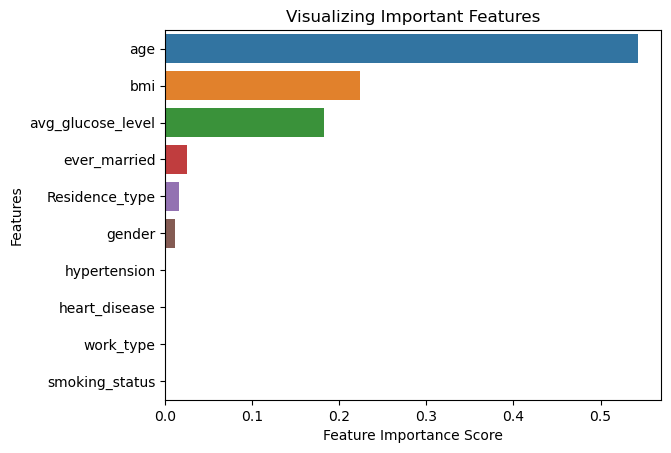

In [41]:
# Create a bar plot.
sns.barplot(x=feature_scores, y=feature_scores.index)

# Lable the graph.
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

## Retraining Models on Important Features

In [42]:
# Select the most important features and target variables.
x1 = dataset_new.drop(["stroke", "work_type", "smoking_status"],axis=1)
y1 = dataset_new[["stroke"]]

In [43]:
# Perform over sampling once again to balance the data.
smote1 = SMOTE(random_state = 42)
x1_smote1, y1_smote1 = smote1.fit_resample(x1, y1)

In [44]:
# Split the dataset into train set and test set.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_smote1, y1_smote1, test_size = 0.33, random_state = 42)

# Standardize the features by scaling.
scaler = StandardScaler()
x1_train_scaled = scaler.fit_transform(x1_train)
x1_test_scaled = scaler.transform(x1_test)

In [49]:
# Retrained Logistic Regression:
# Create a logistic regression classifier.
clf1 = LogisticRegression()

# Train the Logistic Regression model on the training data.
clf1.fit(x1_train_scaled, y_train)

# Predict probabilities of each class for the test data.
y1_pred_probs = clf1.predict_proba(x1_test_scaled)

# Predict class labels. 
y1_pred_clf1 = np.argmax(y1_pred_probs, axis=1)

# Calculate and print the test accuracy score.
test_accuracy = accuracy_score(y1_test, y1_pred_clf1)
print("Retrained Logistic Regression Test Accuracy:", test_accuracy*100,"%")
 
# Print the classification report for logistic regression classifier.
print(classification_report(y1_test, y1_pred_clf1))

# Create a confusion matrix for the logistic regression classifier.
cm = confusion_matrix(y1_test, y1_pred_clf1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained Logistic Regression Test Accuracy: 75.40112634151525 %
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      9387
           1       0.74      0.79      0.76      9435

    accuracy                           0.75     18822
   macro avg       0.76      0.75      0.75     18822
weighted avg       0.76      0.75      0.75     18822

Confusion matrix after selected features:

 [[6730 2657]
 [1973 7462]]


In [50]:
# Retrained Support Vector Machine (SVM):
# Build and train the model.
SVM1 = SVC(kernel="linear")
SVM1.fit(x1_train_scaled, y1_train)

# Make predictions.
predictions1 = SVM1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
predictions1 = SVM1.predict(x1_test_scaled)
print("Retrained SVM Test Accuracy:", accuracy_score(y1_test, predictions1)*100,"%")

# Print the classification report for SVM classifier.
print(classification_report(y1_test, predictions1))

# Create a confusion matrix for the SVM classifier. 
cm = confusion_matrix(y1_test, predictions1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained SVM Test Accuracy: 75.65083413027308 %
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      9387
           1       0.73      0.81      0.77      9435

    accuracy                           0.76     18822
   macro avg       0.76      0.76      0.76     18822
weighted avg       0.76      0.76      0.76     18822

Confusion matrix after selected features:

 [[6643 2744]
 [1839 7596]]


In [52]:
# Retrained Random Forest:
# Create a Random Forest classifier.
rfc1 = RandomForestClassifier(random_state=42)

# Fit the model to the train set. 
rfc1.fit(x1_train_scaled, y1_train)

# Predict the Test set results.
y1_pred_rfc1 = rfc1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
print("Retrained Random Forest Test Accuracy:",(accuracy_score(y1_test, y1_pred_rfc1))*100,"%")

# Print the classification report for Random Forest classifier.
print(classification_report(y1_test, y1_pred_rfc1))

# Create a confusion matrix for the Random Forest classifier.
cm = confusion_matrix(y1_test, y1_pred_rfc1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained Random Forest Test Accuracy: 94.65519073424716 %
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      9387
           1       0.93      0.96      0.95      9435

    accuracy                           0.95     18822
   macro avg       0.95      0.95      0.95     18822
weighted avg       0.95      0.95      0.95     18822

Confusion matrix after selected features:

 [[8722  665]
 [ 341 9094]]


In [53]:
# Retrained K Nearest Neighbour:
# Create a KNN classifier.
knn1 = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data.
knn1.fit(x1_train_scaled, y1_train)

# Predict the Test set results.
y1_pred_knn1 = knn1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
print("Retrained KNN Test Accuracy:", (accuracy_score(y1_test, y1_pred_knn1)) * 100, "%")

# Print the classification report for KNN classifier.
print(classification_report(y1_test, y1_pred_knn1))

# Create a confusion matrix for the KNN classifier. 
cm = confusion_matrix(y1_test, y1_pred_knn1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained KNN Test Accuracy: 90.02231431303794 %
              precision    recall  f1-score   support

           0       0.97      0.83      0.89      9387
           1       0.85      0.97      0.91      9435

    accuracy                           0.90     18822
   macro avg       0.91      0.90      0.90     18822
weighted avg       0.91      0.90      0.90     18822

Confusion matrix after selected features:

 [[7768 1619]
 [ 259 9176]]


In [54]:
# Retrained Naive Bayes:
# Create a Naive Bayes classifier.
nbc1 = GaussianNB()

# Fit the model to the training data.
nbc1.fit(x1_train_scaled, y1_train)

# Predict the Test set results.
y1_pred_nbc1 = nbc1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
print("Retrained Naive Bayes Test Accuracy:", (accuracy_score(y1_test, y1_pred_nbc1)) * 100, "%")

# Print the classification report for Naive Bayes classifier.
print(classification_report(y1_test, y1_pred_nbc1))

# Create a confusion matrix for the Naive Bayes classifier. 
cm = confusion_matrix(y1_test, y1_pred_nbc1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained Naive Bayes Test Accuracy: 72.29837424290724 %
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      9387
           1       0.69      0.81      0.74      9435

    accuracy                           0.72     18822
   macro avg       0.73      0.72      0.72     18822
weighted avg       0.73      0.72      0.72     18822

Confusion matrix after selected features:

 [[5999 3388]
 [1826 7609]]


In [55]:
# Retrained XGBoost:
# Create ana XGBoost clssifier.
xgb1 = XGBClassifier(objective='binary:logistic', n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data.
xgb1.fit(x1_train_scaled, y1_train)

# Predict the Test set results.
y1_pred_xgb1 = xgb1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
print("Retrained XGBoost Test Accuracy:", (accuracy_score(y1_test, y1_pred_xgb1)) * 100, "%")

# Print the classification report for XGBoost classifier.
print(classification_report(y1_test, y1_pred_xgb1))

# Create a confusion matrix for the XGBoost classifier. 
cm = confusion_matrix(y1_test, y1_pred_xgb1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained XGBoost Test Accuracy: 87.58899160556795 %
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      9387
           1       0.88      0.87      0.88      9435

    accuracy                           0.88     18822
   macro avg       0.88      0.88      0.88     18822
weighted avg       0.88      0.88      0.88     18822

Confusion matrix after selected features:

 [[8231 1156]
 [1180 8255]]


In [56]:
# Retrained AdaBoost:
# Create an AdaBoost classifier.
ada1 = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Fit the model to the training data.
ada1.fit(x1_train_scaled, y1_train)

# Predict the Test set results.
y1_pred_ada1 = ada1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
print("Retrained AdaBoost Test Accuracy:", (accuracy_score(y1_test, y1_pred_ada1)) * 100, "%")

# Print the classification report for AdaBoost classifier.
print(classification_report(y1_test, y1_pred_ada1))

# Create a confusion matrix for the AdaBoost classifier. 
cm = confusion_matrix(y1_test, y1_pred_ada1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained AdaBoost Test Accuracy: 76.89406014238656 %
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      9387
           1       0.74      0.84      0.78      9435

    accuracy                           0.77     18822
   macro avg       0.77      0.77      0.77     18822
weighted avg       0.77      0.77      0.77     18822

Confusion matrix after selected features:

 [[6581 2806]
 [1543 7892]]


In [57]:
# Retrained Gradient Boost:
# Create a Gradient Boost classifier.
gbc1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model to the training data.
gbc1.fit(x1_train_scaled, y1_train)

# Predict the Test set results.
y1_pred_gbc1 = gbc1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
print("Retrained Gradient Boosting Test Accuracy:", (accuracy_score(y1_test, y1_pred_gbc1)) * 100, "%")

# Print the classification report for Gradient Boost classifier.
print(classification_report(y1_test, y1_pred_gbc1))

# Create a confusion matrix for the Gradient Boost classifier. 
cm = confusion_matrix(y1_test, y1_pred_gbc1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained Gradient Boosting Test Accuracy: 82.63202635214111 %
              precision    recall  f1-score   support

           0       0.86      0.77      0.82      9387
           1       0.80      0.88      0.84      9435

    accuracy                           0.83     18822
   macro avg       0.83      0.83      0.83     18822
weighted avg       0.83      0.83      0.83     18822

Confusion matrix after selected features:

 [[7267 2120]
 [1149 8286]]


In [61]:
# Retrained Decision Tree:
# The accuracy of the model increased after dropping less important features.
# Since the Decision tree model performed the best once again after retraining on 
# important features it will be used for model deployment.
# Create a Decision Tree Classifier.
dtree1 = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data.
dtree1.fit(x1_train_scaled, y1_train)

# Predict the Test set results.
y1_pred_dtree1 = dtree1.predict(x1_test_scaled)

# Calculate and print the test accuracy score.
print("Retrained Decision Tree Test Accuracy:", (accuracy_score(y1_test, y1_pred_dtree1)) * 100, "%")

# Print the classification report for Decision Tree classifier.
print(classification_report(y1_test, y1_pred_dtree1))

# Create a confusion matrix for the Decision Tree classifier.
cm = confusion_matrix(y1_test, y1_pred_dtree1)
print('Confusion matrix after selected features:\n\n', cm)

Retrained Decision Tree Test Accuracy: 97.20539793858251 %
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      9387
           1       0.97      0.98      0.97      9435

    accuracy                           0.97     18822
   macro avg       0.97      0.97      0.97     18822
weighted avg       0.97      0.97      0.97     18822

Confusion matrix after selected features:

 [[9087  300]
 [ 226 9209]]


# Model Deployment

In [59]:
# The rest of the code will be shared in another .py file. 
import pickle
filename = "Strokesdataset_2.sav"
pickle.dump(dtree1, open(filename, "wb"))

## Resources

##### 1. https://www.kaggle.com/code/cthng123/stroke-prediction

##### 2. https://www.kaggle.com/code/cthng123/stroke-prediction

##### 3. https://www.kaggle.com/code/gauravduttakiit/hyperparameter-tuning-in-decision-trees

##### 4. https://www.mdpi.com/1424-8220/22/13/4670